# Geospatial Web Services & Web Mapping in 2D / 3D

<img align="right" width=100 height=190 src="../images/TUM_Logo_blau_rgb_p.png"/>

<blockquote>
Munich Technical University / Chair of Geoinformatics <br> 
Murat Kendir*, Jicang Zhu, Prof. Thomas Kolbe <br> 
murat.kendir@tum.de
</blockquote>

<div align="right" style="font-size:0.5em;">v. WiSe 2025-2026</div>

## Table of Contents

- [0. Aim of the Exercise](#0-aim-of-the-exercise)
- [1. Accessing WMS service with Python](#1-accessing-wms-service-with-python)
    - [1.1. Examine a WMS service with OWSLib](#11-examine-a-wms-service-with-owslib)
    - [1.2. Add a WMS layer to Jupyter Notebook using ipyLeaflet](#12-add-a-wms-layer-to-jupyter-notebook-using-ipyleaflet)
- [2. Accessing WMS services from JavaScript libraries](#2-accessing-wms-services-from-javascript-libraries)
    - [2.1. Adding WMS services to OpenLayers](#21-adding-wms-services-to-openlayers)
    - [2.2. Adding WMS services to CesiumJS](#22-adding-wms-services-to-cesiumjs)
    - [2.3. Using OGC Feature API as GeoJSON source in Cesium](#23-using-ogc-feature-api-as-geojson-source-in-cesium)
- [3. Fundamentals of 3D Visualization in CesiumJS](#3-fundamentals-of-3d-visualization-in-cesiumjs)
    - [3.1. Adding 3D Buildings to the Cesium viewer](#31-adding-3d-buildings-to-the-cesium-viewer)
    - [3.2. Adding terrain to the Cesium viewer](#32-adding-terrain-to-the-cesium-viewer)
    - [3.3. Adding custom terrain models, 3DTiles and WMS services to Cesium](#33-adding-custom-terrain-models-3dtiles-and-wms-services-to-cesium)



## 0. Aim of the Exercise

- In this exercise, you will learn how to use geospatial web services in your applications or web views and how to use the operations supported by the web service. 
- In the previous exercise, we selected a few web map services from the given Spatial Data Infrastructures (SDIs) and examined the responses using GIS software. 
- Now you will learn how to connect to and interact with geospatial web services with the help of some popular libraries. Additionally, you will learn how to use 2D and 3D JavaScript libraries which supports and visualize 2D or 3D datasets or web services.

## 1. Accessing WMS service with Python

OWSLib is one of the OGC compliant web service client and it supports OGC interface standards.
Before using the OWSLib consider the following steps:
- If you are not working wholetale.org, please install OWSLib to your current python environment using : **pip install OWSLib**
- Then you need to import the OWSLib library into your code.
- Check the following site to get more information about the OWSLib:
  - [https://owslib.readthedocs.io/en/latest/](https://owslib.readthedocs.io/en/latest/) 

In [1]:
import owslib

- [ ] Check available contents (packages + classes) in the library with following code:
```help(owslib)```

You can specify a class or package to reduce the loaded library content in your code.
There are multiple ways to do so:
- First Option: ```from owslib import wms```
  - Imports only wms module from owslib package
  - Type: ```help(wms)```
- Second Option: ```import owslib.wms```
  - Again, it calls only wms module from owslib package
  - Type: ```help(owslib.wms)```
- Another option to import only the relevant function: ```from owslib.wms import WebMapService as any_shorten_form```
  - Imports only WebMapService function in the wms module and assigns a custom alias to it.
  - Type: ```help(any_shorten_form)```

### 1.1. Examine a WMS service with OWSLib
Select any Web Map Service (WMS) from your previous work, or select a random WMS that covers the city of Hamburg in whole or in part. (If you want to add a random WMS, revisit the [Hamburg TransparenzPortal](https://transparenz.hamburg.de) or [geoportal.de](https://geoportal.de) or [INSPIRE Geoportal](https://inspire-geoportal.ec.europa.eu) websites to search for the appropriate web service.)

In [13]:
# Decide a way to import the library. 
from owslib.wms import WebMapService as mywms
# help(mywms)

If you type help(mywms), you will see an explanation of the function as below.
  
  WebMapService(**url**, version='1.1.1', xml=None, username=None, ...)

Notice that only "url" parameter is not assigned to a value. This means that the only mandatory parameter is the "url" and all other parameters will be accepted with their default values unless their values are specified.

Now, test your selected WMS with the imported WebMapService function.

In [14]:
# mytest = mywms('https://geodienste.hamburg.de/HH_WMS_DGM1')
# The website serves the metadata of the WMS highlights that
# the recommended version is "1.3.0". So we can specify that:
mytest = mywms('https://geodienste.hamburg.de/HH_WMS_DGM1', version='1.3.0')

Now, you can use "the built-in functions" to know more about the returned object:
```print(mytest)``` / ```type(mytest)``` / ```help(mytest)``` / ```dir(mytest)```
If you are sure about the data is an iterable object (tuple, set, list, dictionary) then you can use also "list" function.

In [3]:
list(mytest.contents)
# Alternatively: print(mytest.contents.keys())

['HH_WMS_DGM1', 'WMS_DGM1_HAMBURG', 'WMS_DGM1_farbig', 'WMS_DGM1_farbig_10000']

- Check the available methods by typing dir(mytest).
  - You may notice the "operations" method in the list.

In [4]:
list(mytest.operations)

- As operations stored as objects in a list (array), we can access them using list index (For Exp. mylist[0]). Then you can check the available methods or attributes in the class instance by typing ```dir(mytest.operations[0])```. 

In [5]:
print( type(mytest.operations[0]) )
print(mytest.operations[0].name)
print(mytest.operations[1].name)
print(mytest.operations[2].name)
print(mytest.operations[3].name)
print(mytest.operations[4].name)
print(mytest.operations[5].name)
# print(mytest.operations[0].formatOptions)
# print(mytest.operations[0].methods)

<class 'owslib.map.wms130.OperationMetadata'>
GetCapabilities
GetMap
GetFeatureInfo
DescribeLayer
GetLegendGraphic
GetStyles


- Alternatively, you can inspect the webservice using the "getServiceXML" method. Please note that the result will be returned as a binary file in XML format. This means that you have to consider the binary format if you want to store or read the returned object as a file. For example, we specified the file mode as "wb" (Write + Binary) in the following code, because the object "mytest.getServiceXML()" was in bytes format, not a string. 

In [6]:
# type(mytest.getServiceXML())
# Specify your own relative or full path to save the XML file, if it is required.
with open("../responses/exr4/my_wms_servicexml.xml", "wb") as my_wms_xml:
        my_wms_xml.write(mytest.getServiceXML())

- Check the saved XML file and try to find where the layers, bounding boxes or coordinate reference systems (CRSs) are defined.
<blockquote> Reminder: Firefox and Google Chrome browsers have some extensions to visiualize XML files in a "pretty" way. Otherwise you can open the XML file with your favorite text editor and search for a "pretty print" solution. (For Example: XMLTools extension is available in the Notepad++ plugin repository.)
</blockquote>

- You can also send queries to get single images with predefined properties. To do that, you may need to expose more informaiton about the WMS service using following commands:

In [7]:
print(mytest['WMS_DGM1_HAMBURG'].crsOptions, '\n')
print(mytest['WMS_DGM1_HAMBURG'].boundingBox, '\n')
print(mytest['WMS_DGM1_HAMBURG'].styles, '\n')
print(mytest.getOperationByName('GetMap').formatOptions)

['EPSG:25833', 'EPSG:4647', 'EPSG:4258', 'EPSG:31467', 'EPSG:3044', 'EPSG:4326', 'EPSG:3857', 'EPSG:25832', 'CRS:84'] 

(8.482047, 53.385591, 10.355638, 53.941383) 

{'default': {'title': 'default', 'legend': 'https://geodienste.hamburg.de/HH_WMS_DGM1?language=ger&version=1.3.0&service=WMS&request=GetLegendGraphic&sld_version=1.1.0&layer=WMS_DGM1_HAMBURG&format=image/png&STYLE=default', 'legend_width': '298', 'legend_height': '865', 'legend_format': 'image/png'}} 

['image/png', 'image/jpeg', 'image/png; mode=8bit', 'image/vnd.jpeg-png', 'image/vnd.jpeg-png8', 'application/x-pdf', 'image/svg+xml', 'image/tiff', 'application/vnd.google-earth.kml+xml', 'application/vnd.google-earth.kmz', 'application/vnd.mapbox-vector-tile', 'application/x-protobuf', 'application/json']


- So, you are aware of capability of the WMS service and you can use this data to get data from the server:
<blockquote>Note that if you are using a different WMS service, you need to change the parameters given in the next example.</blockquote>

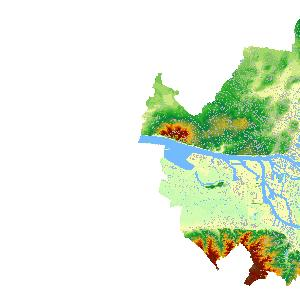

In [8]:
from IPython.display import Image

img = mytest.getmap(
    layers=['WMS_DGM1_HAMBURG'],
    size=[300, 300],
    srs="EPSG:4326",
    bbox=[9.5, 53.4, 10, 53.7],
    format="image/jpeg")

Image(img.read())

### 1.2. Add a WMS layer to Jupyter Notebook using ipyLeaflet
As you may know that leaflet is well known and simple-to-use web map library based on JavaScript. However, leaflet has also a widget implementation with Python Notebook which lets users to visualize their leaflet maps in notebook documents. To start using ipyleaflet, type ```pip install ipyleaflet``` in your python environment or follow the instructions to install ipyleaflet which are available in [this website](https://ipyleaflet.readthedocs.io/en/latest/installation/index.html).

In [16]:
from ipyleaflet import Map

center = (53.547668, 9.985685)
map = Map(center=center, zoom=13)
display(map)

Map(center=[53.547668, 9.985685], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

You can change the basemap by importing "basemaps" class into your code.

In [11]:
from ipyleaflet import Map, basemaps
from ipywidgets.embed import embed_minimal_html
import IPython


center = (53.547668, 9.985685)
map = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=13)
#display(map)
src = '../raw_codes/web_mapping/ipyleaflet_basemap.html'
embed_minimal_html(src, views=[map])
IPython.display.IFrame(src, width='100%', height='300px')

Now, we can add our WMS service to the leaflet widget by specifying the connectiond details.

In [11]:
from ipyleaflet import Map, basemaps, WMSLayer
center = (53.547668, 9.985685)
map = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=13)
wms = WMSLayer(
    url='https://geodienste.hamburg.de/HH_WMS_DGM1',
    layers='WMS_DGM1_HAMBURG',
    format='image/png',
    transparent=True
)
map.add(wms)
map

Map(center=[53.547668, 9.985685], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

Alternatively, you can call any WMS parameter including URL from the former OWSLib object.

In [15]:
center = (53.547668, 9.985685)
map = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=13)

# print(mytest.url) # Shows the URL of WMS Server
# list(mytest.items()) # Lists the available layers
# print(mytest.items()[0][0]) # Exposes one of the layers in WMS Server
# print(mytest['HH_WMS_DGM1'].name) # Takes only the name of the specified layer 
# print(mytest.getOperationByName('GetMap').formatOptions[0]) 
    # Gives one of the possible image format

wms = WMSLayer(
    url= mytest.url,
    layers=mytest.items()[0][0],
    format= mytest.getOperationByName('GetMap').formatOptions[0],
    transparent=True
)
map.add(wms)
map

Map(center=[53.547668, 9.985685], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

- ipyLeaflet allows users to create some interactions on their notebooks. Incidentally, it should be noted that these interactions may be less than using the leaflet library in pure JavaScript. Here is one of the posssible interaction of ipyleaflet package, which is clearly described in the [documentation page](https://ipyleaflet.readthedocs.io/en/latest/controls/split_map_control.html).

In [10]:
from ipyleaflet import Map, basemaps, WMSLayer, SplitMapControl

m = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=16)
wms1 = WMSLayer(
    url='https://geodienste.hamburg.de/HH_WMS_INSPIRE_Gebaeude_2D_ALKIS',
    layers='BU.Building',
    format='image/png',
    transparent=True
)

wms2 = WMSLayer(
    url='https://geodienste.hamburg.de/HH_WMS_INSPIRE_Flurstuecke',
    layers='CadastralParcels',
    format='image/png',
    transparent=True
)

right_layer = wms1
left_layer = wms2

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add(control)

m

Map(center=[53.547668, 9.985685], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

- You might be wondering what happens to the console (or terminal window) after running the leaflet widget. The console is still there. All you need to show it again is to enable the console by going to View > Show Log Console in the python notebook window.

![Show Log Console](../images/exr4/python_show_log_console.png)

- In the next exercise you will experience how to drag a marker on the map and then send/print its coordinates to the console.

In [11]:
from ipyleaflet import Map, basemaps, WMSLayer, Marker

def on_location_changed(event):
    # Do some computation given the new marker location, accessible from `event['new']`
    #print(event)
    marker = Marker(location=event['new'], draggable=True)
    print(marker.location)
    pass

center = (53.547668, 9.985685)
marker = Marker(location=center, draggable=True)
marker.observe(on_location_changed, 'location')

# help(marker.observe)
map = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=13)
map.add(marker)
wms = WMSLayer(
    url='https://geodienste.hamburg.de/HH_WMS_DGM1',
    layers='WMS_DGM1_HAMBURG',
    format='image/png',
    transparent=True
)
map.add(wms)
display(map)

Map(center=[53.547668, 9.985685], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

- If you are interested in visualizing a 2D/3D map in a python notebook, ipyleaflet can be considered a good starting point in terms of learning curve. However, there are many different alternative python libraries that support 2D/3D geographic data visualization in python notebooks or in a python framework (Flask, Django etc). Take a glance over these libraries, if you want:
  - [Folium](https://python-visualization.github.io/folium/latest/)
  - [LeafMap](https://leafmap.org/)
  - [MapboxGL](https://mapbox-mapboxgl-jupyter.readthedocs-hosted.com/en/latest/)
  - [Plotly](https://plotly.com/python/)
  - [pyDeck](https://deckgl.readthedocs.io/en/latest/index.html)
  - [CesiumPy](https://cesiumpy.readthedocs.io/en/stable/)
 
- If you are looking for more geospatial python libraries or resources, check out the following repository listing some well-known libraries and resources:
  - [GeoPythonInfoTree](https://tum-gis.github.io/geoPythonInfoTree/)

## 2. Accessing WMS services from JavaScript libraries

There are many JavaScript libraries that support 2D or 3D map visualizations in web browsers, and sometimes these libraries are used internally as the base environment in desktop applications without resorting to any web browser. For example, threeJS is a JavaScript library that supports visualizing geospatial data on it, meanwhile it is used as a 3D Viewer in QGIS. 

### 2.1. Adding WMS services to OpenLayers

OpenLayers is one of the oldest and most advanced 2D map viewer libraries in JavaScript. When working in Python, you can search for a "wrapper" for these JavaScript libraries and import them into your code (For Exp. ipyleaflet was a python wrapper of leaflet JavaScript library). You also have another option to store these HTML+JavaScript packages in your directory and render them using the IPython package with the IFrame function (same with the iframe tag in HTML). This method will give you the chance to render HTML in a frame and access it from the Jupyter notebook as well. However, you can also run these standalone HTML files from your directory just by clicking on them.

In [12]:
import IPython

src = '../raw_codes/web_mapping/openlayers_empty_viewer.html'

IPython.display.IFrame(src, width='100%', height='300px')

- Alternatively, you can play with the file in a playground-like web applicaiton like fiddle:
  - [Copy & Edit the HTML + JavaScript bundle in JSFiddle](https://jsfiddle.net/muratkendir/tokr36hf/2/)
  - Notice that the OpenLayers JavaScript library is called from an external source here (Check "URL Resources" on left panel). 

So, examine the JavaScript code here to understand fundamentals of OpenLayers:
- "ol" is an abbreviation of OpenLayers here.
  - "map" class called from this library and three subobjects specified.
  - 1: target 2: layers 3: view
    - "target" is the ID of the HTMLElement. Check <div> elements in HTML document.
    - "layers" is the predefined layer objects in map view.
    - "view" is the definition of the view pane.

> TIP: If no coordinate reference system (CRS) is defined, pseudo-mercator (Web Mercator / EPSG:3857) is usually used as the default CRS.
```JavaScript
var map = new ol.Map({  
        target: 'map',
        layers: [
          new ol.layer.Tile({
            source: new ol.source.OSM()
          })
        ],
        view: new ol.View({
          center: [1287392,6123424],
          zoom: 10
        })
      });
```
- Check following web documentation pages to investiage called classes in the code above.
  - [ol.Map Class](https://openlayers.org/en/latest/apidoc/module-ol_Map-Map.html)
  - [ol.layer.Tile Class](https://openlayers.org/en/latest/apidoc/module-ol_layer_Tile-TileLayer.html)
  - [ol.View Class](https://openlayers.org/en/latest/apidoc/module-ol_View-View.html)

- Now, you can add a wms layer by adding following object to the layers. 

```JavaScript
new ol.layer.Tile({
      source: new ol.source.TileWMS({
        url: 'https://sgx.geodatenzentrum.de/wms_basemapde',
        params: {
            'LAYERS': 'de_basemapde_web_raster_farbe',
            'FORMAT': 'image/png',
        }
      })
    }),
```

In [13]:
import IPython

src = '../raw_codes/web_mapping/openlayers_with_wms.html'

IPython.display.IFrame(src, width='100%', height='300px')

- Alternatively, you can play with the file in a playground-like web applicaiton like fiddle:
  - [Copy & Edit the HTML + JavaScript bundle in JSFiddle](https://jsfiddle.net/muratkendir/7k1pxhsm/)
  - Note that the basemap is still OSM, but all of Germany is covered by a WMS layer provided by basemap.de (zoom out until you see the European continent)

- You can also check the different web service types, the API documentation of the supported classes and experience how OpenLayers supports these web services in the map view:
  - "Single Image WMS" - [sample link](https://openlayers.org/en/latest/examples/wms-image.html) | [API Docs - ImageWMS](https://openlayers.org/en/latest/apidoc/module-ol_source_ImageWMS-ImageWMS.html)
  - "Tiled WMS layer" - [sample link](https://openlayers.org/en/latest/examples/wms-tiled.html) | [API Docs - TileWMS](https://openlayers.org/en/latest/apidoc/module-ol_source_TileWMS-TileWMS.html)
  - "WMTS layer" - [sample link](https://openlayers.org/en/latest/examples/wmts.html) | [API Docs - WMTS](https://openlayers.org/en/latest/apidoc/module-ol_source_WMTS-WMTS.html)
  - "WMS (1.3) with GetFeatureInfo function" - [sample link](https://openlayers.org/en/latest/examples/getfeatureinfo-image.html) | (Check ImageWMS API Docs)
  - "WFS vector layer" - [sample link](https://openlayers.org/en/latest/examples/vector-wfs.html) | [API Docs - VectorLayer](https://openlayers.org/en/latest/apidoc/module-ol_renderer_canvas_VectorLayer-CanvasVectorLayerRenderer.html)
  - "WFS vector layer with getFeature function" - [sample link](https://openlayers.org/en/latest/examples/vector-wfs-getfeature.html) | [API Docs - WFS GetFeature](https://openlayers.org/en/latest/apidoc/module-ol_format_WFS-WFS.html)

> TIP : You can start to play with the given codes by clicking to "Edit" button at right top corner.

### 2.2. Adding WMS services to CesiumJS
CesiumJS is a popular 3D Map view library that supports additional 3D assets (object collections) such as 3D Tiles, tiled terrain models, GLTF/GLB (3D) models, etc. However, as a common map display environment, CesiumJS continues to support widely used geospatial data formats and web services such as GeoJSON, WMS, WMTS, etc. Just like we did before for OpenLayers, you can call CesiumJS libraries from a remote repository and visualize them here as HTML views:

In [5]:
import IPython

src = '../raw_codes/web_mapping/cesium_empty_viewer.html'

IPython.display.IFrame(src, width='100%', height='400px')

- Alternatively, you can play with the file in Sandcastle (a playground provided by CesiumJS):
  - [Sample in Cesium Sandcastle](https://sandcastle.cesium.com/#c=dZLRb9owEMb/lRMvMCmzQQN1YhRNo6qG1KrT6PbEQ93kSE5zzpF9AbGp//tMQgZlW54ud9/3k++zAbSGJZOQsfQTQQqEBQaqS/hOuEMPxE3z8+P9HaDFEllgR1I03ae00S4ciyFG/wTLG7Xm1HEQ2LaAa2DcHaGqhQ76F75+Ar/WDM2n9beA8FAhr8Qjyr2pQjej0uTo91+821IW2dNz9ivL8rVy8AcPUHsbjf1CpApTrY0SsqhcdIfGXZpKOZ/rfmd5eZN05aa2NqRRxZ9qEcdT8TUCnJQf2jKmemv3TUapKdEbEAcrw3DrDacUUgdGmnFOW2SwjnOSOsMErJFjZTiDAikvRLXUNlHVEtXG7h/dabEMgxBHs+O43jGThfESK8Pv1Ma78gbzePYwGI3U5GqSjN+r0fAqgfFwODzt6DzFS+5AZ8EVaDLi/ES/N1IocV9j23AYDNUZBaAiSYv/it+OJ+fyl7ZoAuwlvVmQvcV5N/1IZeW8HK5uoJQWLKsYEwb9XKc/UFQaQpf8TJ9bZxltgbLrde/ixa17kFoTQpwc7nQVH/+6N5/pqP/Lal2z98MWvTX7g6wYze/aplJqpuPvv53inH02/oL8Gw)

- If you examine the code in the example, you will notice that a main object (viewer) is called to the scene:
  - [viewer](https://cesium.com/learn/cesiumjs/ref-doc/Viewer.html)
- Then one of the possible imagery provider class "OpenStreetMap" called into the DOM element called "cesiumContainer"
  - [OpenStreetMapImageryProvider](https://cesium.com/learn/cesiumjs/ref-doc/OpenStreetMapImageryProvider.html?classFilter=imageryprovider)

- Camera is a need to set an oblique view to the interested area. There are multiple techniques to set a view (check the [link](https://cesium.com/learn/cesiumjs-learn/cesiumjs-camera/)), but one of the most used method is setting heading-pitch-roll angles. If you are unfmailiar with heading-pitch-roll angles, visit following page: [Heading(Yaw)-Pitch-Roll](https://en.wikipedia.org/wiki/Aircraft_flight_dynamics).
```JavaScript
const viewer = new Cesium.Viewer('cesiumContainer', {
  imageryProvider: new Cesium.OpenStreetMapImageryProvider({
    url: 'https://a.tile.openstreetmap.org/'
  }),
  fullscreenButton: true
});
viewer.camera.flyTo({
  destination: Cesium.Cartesian3.fromDegrees(11.575, 48.107, 4000),
  orientation: {
    heading: Cesium.Math.toRadians(0.0),
    pitch: Cesium.Math.toRadians(-45.0),
  }
});
```

>TIP : OpenStreetMapImageryProvider is only one of the available options for adding image layers to CesiumJS. You can type "ImageryProvider" in the serarch box on the API documentation page to find out all the possibilities.

- Similarly to OpenLayers code, you can add WMS service as a basemap option to the Cesium scene by specifying the parameters.

```JavaScript
var geourl = 'https://sgx.geodatenzentrum.de/wms_basemapde';
var imageryLayers = viewer.imageryLayers;
var geoWmsLayer = new Cesium.WebMapServiceImageryProvider({
                    url : geourl,
                    parameters: {
                        service : 'WMS',
                        format : 'image/png',
                    },   
                    layers : 'de_basemapde_web_raster_farbe',
                    EPSG: '4326'
                    });

viewer.scene.imageryLayers.removeAll();
imageryLayers.addImageryProvider(geoWmsLayer);
```

- If we combine this code block with the previous cesium code, we will get following scene:

In [6]:
import IPython

src = '../raw_codes/web_mapping/cesium_with_wms.html'

IPython.display.IFrame(src, width='100%', height='400px')

- Also check the following samples and related API documentations to learn more about the possibilities in CeisumJS:
    - [Imagery Layers](https://sandcastle.cesium.com/?src=Imagery%20Layers.html&label=Beginner) | [API Docs - ImageryProvider](https://cesium.com/learn/cesiumjs/ref-doc/ImageryProvider.html)
    - [WMTS layer with Time dimension](https://sandcastle.cesium.com/?src=Web%20Map%20Tile%20Service%20with%20Time.html&label=Beginner) | [WebMapTileServiceImageryProvider](https://cesium.com/learn/cesiumjs/ref-doc/WebMapTileServiceImageryProvider.html)
    - [WMS GetFeatureInfo](https://sandcastle.cesium.com/?src=Web%20Map%20Service%20(WMS).html&label=Beginner) | (Check the ImageryProvider page)
    - [OSM 3D Buildings Dataset](https://sandcastle.cesium.com/?src=Cesium%20OSM%20Buildings.html&label=Beginner) | [createOSMBuildings](https://cesium.com/learn/cesiumjs/ref-doc/global.html#createOsmBuildings)
    - [Point Clouds as 3D Tiles](https://sandcastle.cesium.com/?src=3D%20Tiles%20Point%20Cloud.html&label=3D%20Tiles) | [Cesium3DTileset](https://cesium.com/learn/cesiumjs/ref-doc/Cesium3DTileset.html)
    - [Segmented Point Clouds as 3D Tiles](https://sandcastle.cesium.com/?src=3D%20Tiles%20Point%20Cloud%20Classification.html&label=3D%20Tiles) | [Cesium3DTileStyle](https://cesium.com/learn/cesiumjs/ref-doc/Cesium3DTileStyle.html)

### 2.3. Using OGC Feature API as GeoJSON source in Cesium

One of the natively supported formats in CesiumJS is the "GeoJSON" data format. GeoJSON is quite similar to JSON files, but is standardized to support geospatial objects with a defined coordinate reference system and geometry property. This means that any OGC Feature API service that provides GeoJSON files can be easily adapted with CesiumJS scenes. The easiest way to import the OGC Feature API is to predefine the query and format in the URL and reference the URL as if calling a GeoJSON file from a repository.

```JavaScript
// Set a viewer
const viewer = new Cesium.Viewer("cesiumContainer", {});
```

- Prepare the URL refers to OGC Feature API
  - Example taken from the following data source:
    - https://suche.transparenz.hamburg.de/dataset/grundwassergleichen-min11
  - Query parameters specifies following filtering options:
    - First 10 (limit=10) of ground water sources which have 20 meters level (gw_stand_in_meter_nhn=20)
      
```JavaScript
feature_api_query = 'https://api.hamburg.de/datasets/v1/grundwassergleichen/collections/u12_l_gleichenplan_min/items?limit=10&gw_stand_in_meter_nhn=20&f=json'
const dataSource = Cesium.GeoJsonDataSource.load(feature_api_query);
```

- Now, you can add the data source  to the viewer and set the viewer extend to cover loaded geojson data source.

```JavaScript
viewer.dataSources.add(dataSource);
viewer.zoomTo(dataSource);
```

In [2]:
import IPython

src = '../raw_codes/web_mapping/cesium_with_geojson.html'

IPython.display.IFrame(src, width='100%', height='400px')

## 3. Fundamentals of 3D Visualization in CesiumJS

We have already added a WMS layer to the 3D map environment using the CesiumJS JavaScript library. Adding 2D overlays (GeoJSON, WMTS, WMS, XYZ basemaps etc) to the 3D map environment is not an outdated or unpopular method, but it is just one step in creating a well-designed 3D map. Generally, the steps required to create a 3D map environment can be summarized as follows: Adding 3D models, adding a 3D terrain model, overlaying the terrain with a coverage and finally adjusting the view to focus on the area of interest. In this step, we will try to follow these instructions one by one and experience 3D assets.

### 3.1. Adding 3D Buildings to the Cesium viewer

There are multiple ways to add 3D Tiles to a Cesium map. First of all, we need to consider that 3D Tiles are a set of binary files defined in JSON format and stored in a hierarchy.
Therefore, to add a 3D Tile to the Cesium map, all that is needed is to find a suitable 3DTiles dataset and reference the main JSON file (usually named as "tileset.json") that stands at the top in the hierarchy. 

Another way to add 3DTiles to a Cesium map is using Cesium Ion and it's datasets which are available to use with or without an access token. OSMBuildings is one of these datasets and it is able to use without an access token.

If you want to discover more about the available datasets, visit the webpage [CesiumIon](https://ion.cesium.com) and check the "Asset Depot" tab after logging in.

Add these codes at the end of your previously code (In section 2.2) and refresh the web page if needed.
```JavaScript
const buildingsTileset = await Cesium.createOsmBuildingsAsync();
viewer.scene.primitives.add(buildingsTileset);
```

In [8]:
import IPython

src = '../raw_codes/web_mapping/cesium_with_wms_with_osm.html'

IPython.display.IFrame(src, width='100%', height='400px')

As you may notice, the predefined 3D building dataset (based on OpenStreetMap extruded buildings, check [OSMBuildings](https://osmbuildings.org) ) is loaded into the scene, but there is a serious problem. The buildings appear to float several hundred meters above the ground. This is because there is no terrain defined yet (a 3d model showing the current heights of the ground) and therefore Cesium works on an artificial surface based on an ellipsoidal geometry (i.e. the WGS84 ellipsoid).

### 3.2. Adding terrain to the Cesium viewer
We can add a globally available terrain by adding these codes into our code. Please consider that, terrain object must be defined in CesiumContainer widget as an option.
```JavaScript
const viewer = new Cesium.Viewer('cesiumContainer', {
        terrain: Cesium.Terrain.fromWorldTerrain(),
    });
```

In [9]:
import IPython

src = '../raw_codes/web_mapping/cesium_with_wms_with_osm_with_terrain.html'

IPython.display.IFrame(src, width='100%', height='400px')

Just like 3D Tiles, terrain models can also be called from external sources. In this way, it is possible to provide moew accurate and precise terrain models which is a need especially when visualizing smaller buildings on bumpy areas (For example click to search button at right top side of the cesium widget and type "Neuschwanstein Castle").  

### 3.3. Adding custom terrain models, 3DTiles and WMS services to Cesium

As mentioned earlier, it is possible to add custom-built 3D Tiles and terrain models to Cesium. As these datasets are usually very large and expensive, there are not many publicly available datasets yet. Most of the time, these datasets are provided by an authority with a requirement to use a token or authentication method.

Let's start building another example from scratch and add custom (and publicly available) terrain models, 3DTiles and a WMS or WMTS service to the Cesium scene.

Remove all previous code and add the following lines to the \<script\> tag.

```JavaScript
// Add following code to activate Cesium viewer with terrain model provided by
// swisstopo team and coumented here: https://api3.geo.admin.ch/services/sdiservices.html
const viewer = new Cesium.Viewer("cesiumContainer", {
      terrain: new Cesium.Terrain(Cesium.CesiumTerrainProvider.fromUrl("https://3d.geo.admin.ch/1.0.0/ch.swisstopo.terrain.3d/default/20200520/4326/"))
});
```

In the next step, define the interested area, in which you want to see both terrain and the buildings together. 
```JavaScript
//Geographic coordinates of famous place Zermatt in Switzerland
var center = Cesium.Cartesian3.fromDegrees(7.6594, 45.9904);
var heading = Cesium.Math.toRadians(0.0);
var pitch = Cesium.Math.toRadians(-90.0);
var range = 5000;
var hpr = new Cesium.HeadingPitchRange(heading, pitch, range);
viewer.camera.lookAt(center, hpr);
```

Add the 3D Buildings or vegetation objects, which has provided as 3DTiles in this [website](https://api3.geo.admin.ch/services/sdiservices.html#d-tiles).
```JavaScript
// Add 3D Buildings or Vegetation objects by using 3DTiles links in following site:
// https://api3.geo.admin.ch/services/sdiservices.html#d-tiles
const buildingsTileset = await Cesium.Cesium3DTileset.fromUrl(
     "https://vectortiles.geo.admin.ch/3d-tiles/ch.swisstopo.swisstlm3d.3d/20201020/tileset.json"
);
viewer.scene.primitives.add(buildingsTileset);
```
> TIP: You can experiment with a 3DTiles dataset that provides LOD2/3 buildings in Munich using following tileset : "https://bvv3d21.bayernwolke.de/3d-data/latest/lod23d/tileset.json"

Finally add the WMS layer similar to the previous steps.

```JavaScript
var geourl = 'https://wms.geo.admin.ch/';
    var imageryLayers = viewer.imageryLayers;
    var geoWmsLayer = new Cesium.WebMapServiceImageryProvider({
            url : geourl,
            parameters: {
                service : 'WMS',
            format : 'image/png',
            },
     
        layers : 'ch.swisstopo.swisstlm3d-karte-farbe',
            EPSG: '4326'
            });

    viewer.scene.imageryLayers.removeAll();
    imageryLayers.addImageryProvider(geoWmsLayer);
```

In [4]:
import IPython

src = '../raw_codes/web_mapping/cesium_with_everything_custom.html'

IPython.display.IFrame(src, width='100%', height='400px')